
This project is a comprehensive guide to building a Convolutional Neural Network (CNN) for classifying images of rice leaf diseases. The project is divided into several sections, each focusing on a specific part of the machine learning workflow. The sections cover everything from installing dependencies and importing libraries, to loading and preprocessing images, to building, training, and evaluating the model. The project also introduces data augmentation techniques and includes code to display an image before and after data augmentation. The final sections of the project involve building and training a new model with data augmentation, and evaluating this new model’s performance. This project serves as a valuable resource for anyone interested in deep learning and its applications in image recognition. 

## Section One: Installing Dependencies and Importing Relevant Libraries
#### This section installs the necessary Python libraries and imports the relevant modules for the project.

In [1]:
# Installing dependencies
# OpenCV is a library of programming functions mainly aimed at real-time computer vision.
!pip install opencv-python-headless
# TensorFlow is a free and open-source software library for machine learning and artificial intelligence.
!pip install tensorflow

# Importing Relevant Libraries
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for the Python programming language.
import numpy as np  # NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices.
import cv2  # OpenCV library
import os  # The OS module in Python provides functions for interacting with the operating system.

import PIL  # Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
from PIL import Image  # Importing Image module from PIL

import tensorflow as tf  # Importing TensorFlow
from tensorflow import keras  # Keras is an open-source software library that provides a Python interface for artificial neural networks.
from tensorflow.keras import layers  # Layers module provides a high-level API that makes it easy to construct a neural network.
from tensorflow.keras.models import Sequential  # Sequential model is a linear stack of layers.


## Section Two: Function to Load Images
#### This section defines a function to load images from a specified folder and uses this function to load images of different types of rice leaf diseases.

In [2]:
# Function to load images from a specified folder
def load_images_from_folder(folder):
    images = []  # Initialize an empty list to store the images
    for filename in os.listdir(folder):  # Loop over every file in the folder
        img = Image.open(os.path.join(folder, filename))  # Open the image file
        if img is not None:  # If the image file was successfully opened
            images.append(img)  # Append the image to the list
    return images  # Return the list of images

# Usage
# Load images of bacterial blight from the specified folder
bacterial_blight = load_images_from_folder('rice_leaf_diseases/Bacterial_leaf_blight')
# Load images of brown spot from the specified folder
brown_spot = load_images_from_folder('rice_leaf_diseases/Brown_spot')
# Load images of leaf smut from the specified folder
leaf_smut = load_images_from_folder('rice_leaf_diseases/Leaf_smut')


In [3]:
# Get the number of images in the bacterial_blight list
len(bacterial_blight)  # Returns the number of images


40

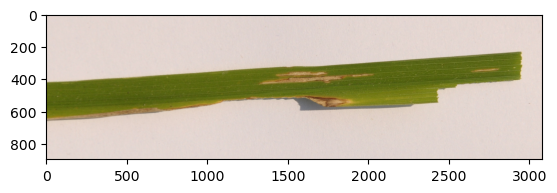

In [4]:
# Visualisation
# Select the first image from the bacterial_blight list
img = bacterial_blight[0]

# Display the image using matplotlib
plt.imshow(img)  # Display the image
plt.show()  # Show the plot


## Section 3: Preprocessing Images and Labels
#### This section creates dictionaries to store the images and their corresponding labels, and then preprocesses the images and labels for machine learning.


In [5]:
# Merge the lists into a dictionary
# Each key in the dictionary represents a type of rice leaf disease
# The value corresponding to each key is a list of images of that disease
image_dict = {
    'Bacterial_leaf_blight': bacterial_blight,
    'Brown_spot': brown_spot,
    'Leaf_smut': leaf_smut
}

# Print the dictionary
# This will print the keys and the memory locations of the lists of images
image_dict


{'Bacterial_leaf_blight': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897>,
  <PIL.JpegImagePlugin.

In [6]:
# Create a dictionary to map the labels to numerical values
# This is often done in machine learning tasks where the model requires numerical input
labels_dict = {
    'Bacterial_leaf_blight': 0,  # Assign 0 to 'Bacterial_leaf_blight'
    'Brown_spot': 1,  # Assign 1 to 'Brown_spot'
    'Leaf_smut': 2  # Assign 2 to 'Leaf_smut'
}


In [7]:
# Convert the first image in the 'Leaf_smut' list from the image_dict dictionary into a string representation
str(image_dict["Leaf_smut"][0])


'<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3081x897 at 0x24630D16750>'

In [8]:
# Get the numerical label for 'Leaf_smut' from the labels_dict dictionary
labels_dict["Leaf_smut"]


2

In [9]:
# Initialize empty lists for the images (X) and their corresponding labels (y)
X, y = [], []

# Loop over the image_dict dictionary
for name, images in image_dict.items():
    # Loop over the images in the current list
    for image in images:
        # If 'image' is a PIL Image object
        if isinstance(image, Image.Image):
            # Convert the image to a numpy array
            img = np.array(image)
        # If 'image' is a file path
        else:
            # Read the image file using OpenCV
            img = cv2.imread(str(image))
        
        # If the image was successfully read
        if img is not None:
            # Resize the image to 180x180 pixels
            resized_img = cv2.resize(img,(180,180))
            # Append the resized image to the X list
            X.append(resized_img)
            # Append the corresponding label to the y list
            y.append(labels_dict[name])
        


## Section 4: Splitting the Dataset and Scaling the Images
#### This section splits the dataset into training and testing sets, and scales the pixel values of the images to be between 0 and 1.

In [10]:
# Convert the lists of images and labels to numpy arrays
X = np.array(X)
y = np.array(y)


In [11]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [12]:
# Print the number of images in the testing set
len(X_test)

30

In [13]:
# Scale the images in the training set by dividing by 255 (the maximum RGB value)
X_train_scaled = X_train / 255

# Scale the images in the testing set by dividing by 255 (the maximum RGB value)
X_test_scaled = X_test / 255

## Section 5: Building and Training the Model
#### This section defines the architecture of the convolutional neural network (CNN) model, compiles the model, and trains it on the scaled training data.

In [14]:
# Set the number of classes (types of rice leaf diseases)
num_classes = 3

# Define the model architecture
model = Sequential([
  # The first convolutional layer with 16 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # The first max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # The second convolutional layer with 32 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  # The second max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # The third convolutional layer with 64 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # The third max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # Flatten layer to convert the 3D feature maps to 1D feature vectors
  layers.Flatten(),
  # A dense (fully connected) layer with 128 units and 'relu' activation function
  layers.Dense(128, activation='relu'),
  # The output layer with 'num_classes' units
  layers.Dense(num_classes)
])

# Compile the model with 'adam' optimizer, 'SparseCategoricalCrossentropy' loss function and 'accuracy' as a metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
# Train the model for 30 epochs using the scaled training data
model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
3/3 [==============================] - 11s 2s/step - loss: 2.5349 - accuracy: 0.2778
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 1.2176 - accuracy: 0.3222
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 1.1124 - accuracy: 0.3778
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 1.0603 - accuracy: 0.3778
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 1.0049 - accuracy: 0.5222
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 1.0022 - accuracy: 0.4333
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.9637 - accuracy: 0.5222
Epoch 8/30
3/3 [==============================] - 6s 2s/step - loss: 0.8873 - accuracy: 0.6000
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 0.8236 - accuracy: 0.6222
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.7405 - accuracy: 0.7333
Epoch 11/30
3/3 [==============================]

## Section 6: Evaluating the Model and Making Predictions
#### This section evaluates the model’s performance on the test dataset, makes predictions on the test dataset, and prints the predictions.

In [15]:
# Evaluate the model on the scaled testing data
model.evaluate(X_test_scaled,y_test)


1/1 [==============================] - 1s 1s/step - loss: 0.9084 - accuracy: 0.7667


[0.9084390997886658, 0.7666666507720947]

In [16]:
# Use the model to make predictions on the scaled testing data
predictions = model.predict(X_test_scaled)
# Print the predictions
predictions


1/1 [==============================] - 1s 1s/step


array([[-12.620298  ,  12.781282  ,   4.8275123 ],
       [ -1.8277268 ,   0.26676366,   4.804761  ],
       [ -0.76992327,   0.0342668 ,   2.4154577 ],
       [  3.713881  ,  -3.037104  ,  -1.9769956 ],
       [ -0.44592157,  -1.9924699 ,   4.4047327 ],
       [  2.3336663 ,  -0.2448431 ,  -5.264472  ],
       [  4.1779966 ,  -4.600811  ,  -0.6320055 ],
       [  6.201364  ,  -3.104448  ,  -7.772133  ],
       [ -3.1180215 ,   4.7643833 ,   1.1763783 ],
       [ -2.5096939 ,   2.3607876 ,   2.776735  ],
       [  3.5773036 ,  -1.94101   ,  -3.5793784 ],
       [-16.39048   ,  10.732469  ,  15.437835  ],
       [  5.150408  ,  -4.142499  ,  -3.9054098 ],
       [  1.344763  ,   0.9875099 ,  -4.1848025 ],
       [ -2.390809  ,   4.415158  ,   0.29938692],
       [ -1.5164874 ,  -1.1029145 ,   5.896754  ],
       [  4.611766  ,  -4.13254   ,  -2.1900823 ],
       [-11.47228   ,   8.855662  ,  10.274077  ],
       [  1.8656896 ,  -1.1296167 ,  -3.7470763 ],
       [ -1.8581798 ,   1.70230

In [17]:
# Apply the softmax function to the first prediction to get probabilities
score = tf.nn.softmax(predictions[0])
print(score)


tf.Tensor([9.291398e-12 9.996488e-01 3.512117e-04], shape=(3,), dtype=float32)


In [18]:
# Get the index of the maximum value in the score array (i.e., the predicted class)
np.argmax(score)

1

In [19]:
# Print the actual class of the first image in the testing set
y_test[0]

1

## Section 7: Data Augmentation
#### This section defines a data augmentation layer that will randomly zoom, rotate, and flip the images during training.

In [20]:
# Create a Sequential model for data augmentation
data_augmentation = keras.Sequential(
  [
    # Randomly zoom the images during training
    layers.experimental.preprocessing.RandomZoom(0.2),
    # Randomly rotate the images during training
    layers.experimental.preprocessing.RandomRotation(0.1),
    # Randomly flip the images horizontally during training
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)


## Section 8: Displaying an Image Before and After Data Augmentation
#### This section displays an image before and after applying the data augmentation, allowing you to visually compare the original and augmented images.

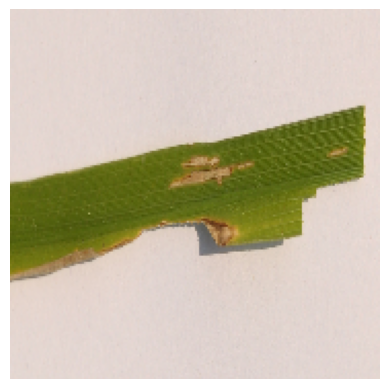

In [21]:
# Turn off the axis
plt.axis('off')
# Display the first image in the dataset
plt.imshow(X[0])


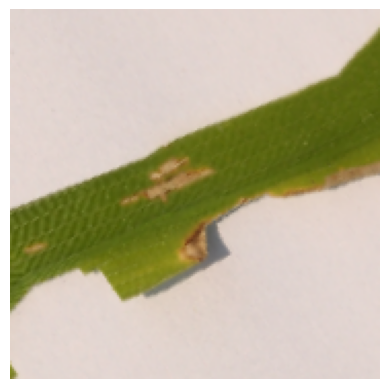

In [22]:
# Turn off the axis again for the second plot
plt.axis('off')
# Display the first image after applying data augmentation
# The numpy() method is called to convert the tensor to a NumPy array
# The astype("uint8") method is called to convert the data type of the array to unsigned integer (8-bit)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


## Section 9: Building and Training the Model with Data Augmentation
#### This section defines a new CNN model that includes the data augmentation layer, compiles the model, and trains it on the scaled training data.

In [23]:
# Set the number of classes (types of rice leaf diseases)
num_classes = 3

# Define the model architecture
model = Sequential([
  # The data augmentation layer
  data_augmentation,
  # The first convolutional layer with 16 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # The first max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # The second convolutional layer with 32 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  # The second max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # The third convolutional layer with 64 filters of size 3x3, 'relu' activation function and same padding
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # The third max pooling layer with pool size 2x2
  layers.MaxPooling2D(),
  # A dropout layer with a dropout rate of 0.1
  layers.Dropout(0.1),
  # Flatten layer to convert the 3D feature maps to 1D feature vectors
  layers.Flatten(),
  # A dense (fully connected) layer with 128 units and 'relu' activation function
  layers.Dense(128, activation='relu'),
  # The output layer with 'num_classes' units
  layers.Dense(num_classes)
])

# Compile the model with 'adam' optimizer, 'SparseCategoricalCrossentropy' loss function and 'accuracy' as a metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
# Train the model for 30 epochs using the scaled training data
model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
3/3 [==============================] - 15s 2s/step - loss: 1.4594 - accuracy: 0.4111
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 1.2272 - accuracy: 0.3778
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 1.0892 - accuracy: 0.4000
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 1.0620 - accuracy: 0.4444
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.0356 - accuracy: 0.4222
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.9832 - accuracy: 0.5333
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.0290 - accuracy: 0.4667
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.9750 - accuracy: 0.5444
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.9512 - accuracy: 0.5889
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.9660 - accuracy: 0.5000
Epoch 11/30
3/3 [==============================]

## Section 10: Evaluating the Model and Making Predictions After Data Augmentation
#### This section evaluates the new model’s performance on the test dataset, makes predictions on the test dataset, and prints the predictions.

In [24]:
# Evaluate the model on the scaled testing data
model.evaluate(X_test_scaled,y_test)


1/1 [==============================] - 1s 1s/step - loss: 0.5022 - accuracy: 0.7667


[0.5021871328353882, 0.7666666507720947]

## Section 11: Adding noise, adjusting lighting, and adding distortion
#### This section adds Gaussian noise to images, adjusts their brightness, and randomly changes their JPEG quality, which can introduce distortion.

In [25]:
# Import the necessary modules
import tensorflow as tf

# Define a function to add noise to an image
def add_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0., stddev=0.005)
    return image + noise

# Define a function to adjust the lighting of an image
def adjust_lighting(image):
    return tf.image.adjust_brightness(image, delta=0.1)

# Define a function to add distortion to an image
def add_distortion(image):
    return tf.image.random_jpeg_quality(image, 70, 100)

# Apply the functions to your images
for i in range(len(X_train_scaled)):
    X_train_scaled[i] = add_noise(X_train_scaled[i])
    X_train_scaled[i] = adjust_lighting(X_train_scaled[i])
    X_train_scaled[i] = add_distortion(X_train_scaled[i])

for i in range(len(X_test_scaled)):
    X_test_scaled[i] = add_noise(X_test_scaled[i])
    X_test_scaled[i] = adjust_lighting(X_test_scaled[i])
    X_test_scaled[i] = add_distortion(X_test_scaled[i])


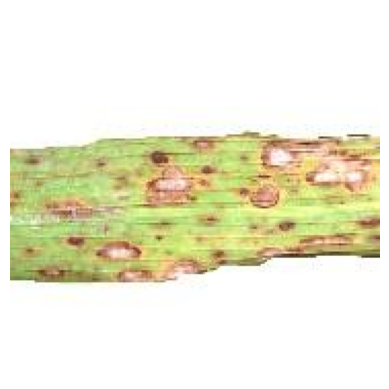

In [26]:
# Turn off the axis again for the second plot
plt.axis('off')
# Display the first image after applying data augmentation


# Display the first image in the training set
plt.imshow(X_train_scaled[0])
plt.show()


In [30]:
# Compile the model with 'adam' optimizer, 'SparseCategoricalCrossentropy' loss function and 'accuracy' as a metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model for 30 epochs using the augmented and scaled training data
model.fit(X_train_scaled, y_train, epochs=30)

# Evaluate the model on the augmented and scaled testing data
model.evaluate(X_test_scaled, y_test)


Epoch 1/30
3/3 [==============================] - 13s 2s/step - loss: 2.9421 - accuracy: 0.2889
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 1.1501 - accuracy: 0.3444
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 1.1100 - accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 1.0960 - accuracy: 0.3556
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.0935 - accuracy: 0.3556
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 1.0847 - accuracy: 0.4000
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.0797 - accuracy: 0.3667
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 1.0441 - accuracy: 0.4778
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 1.0358 - accuracy: 0.4444
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 1.0322 - accuracy: 0.4333
Epoch 11/30
3/3 [==============================]

[0.353580117225647, 0.9666666388511658]

In [31]:
# Evaluate the model on the augmented and scaled testing data
model.evaluate(X_test_scaled, y_test)


1/1 [==============================] - 1s 681ms/step - loss: 0.3536 - accuracy: 0.9667


[0.353580117225647, 0.9666666388511658]

In [33]:
# Save the entire model to a HDF5 file
model.save('Rice_Diseases.h5')


In [34]:
tf.keras.models.save_model(model, 'Rice_Diseases_global')

INFO:tensorflow:Assets written to: Rice_Diseases_global\assets


INFO:tensorflow:Assets written to: Rice_Diseases_global\assets
